# BioHack 2018

/Users/kirillbykov/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


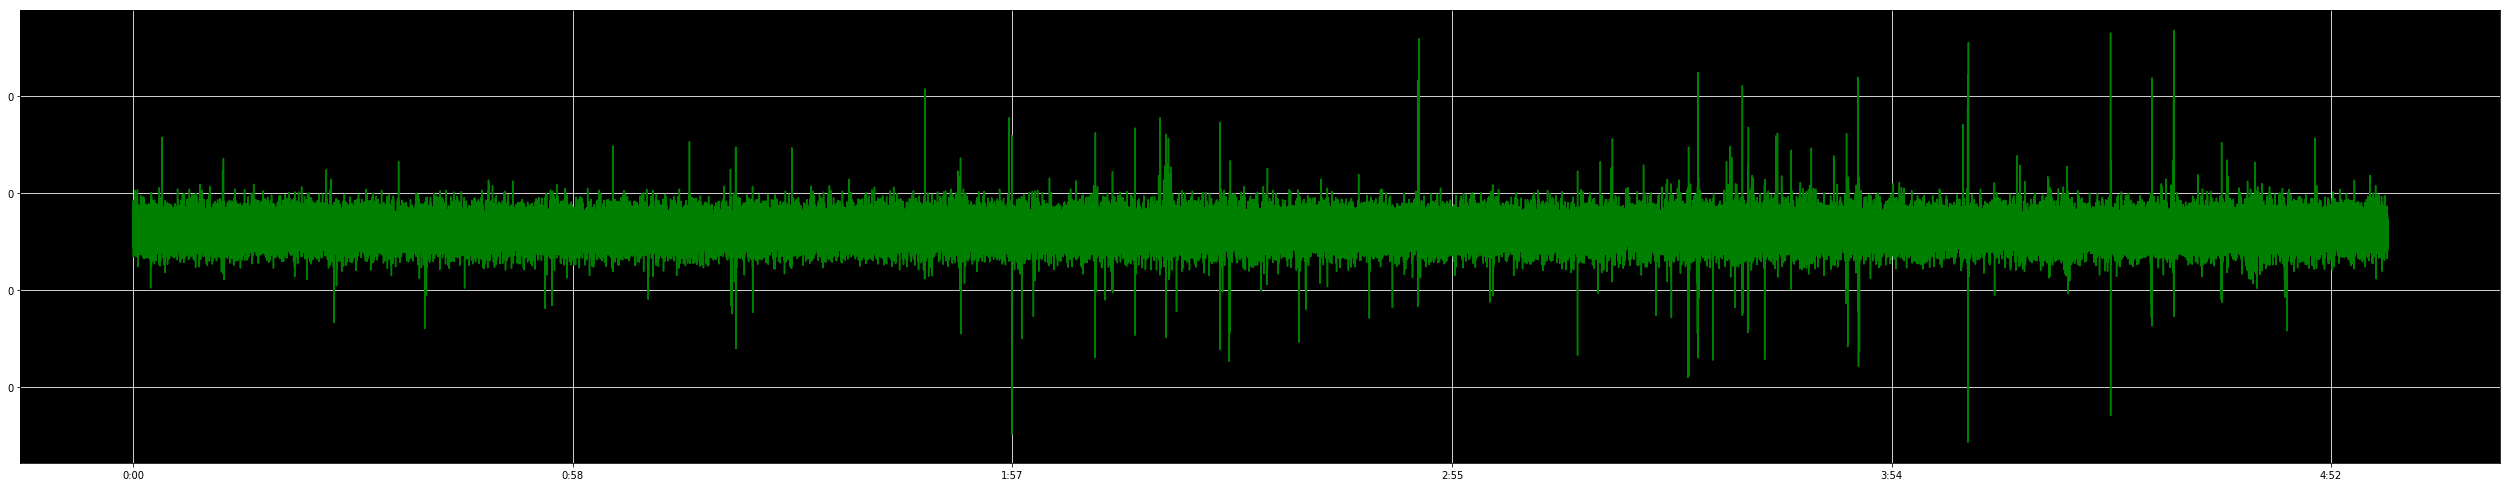

In [10]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}

def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out

def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"

    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)

wav = wave.open("22-03-16-agn-01.wav", mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

duration = nframes / framerate
w, h = 3200, 1200
k = nframes/w/32
DPI = 72
peak = 256 ** sampwidth / 2

content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])

plt.figure(1, figsize=(float(w)/DPI, float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0)

for n in range(nchannels):
    channel = samples[n::nchannels]
    k = math.floor(k)

    channel = channel[0::k]
    if nchannels == 1:
        channel = channel - peak

    axes = plt.subplot(2, 1, n+1, axisbg="k")
    axes.plot(channel, "g")
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(format_db))
    plt.grid(True, color="w")
    axes.xaxis.set_major_formatter(ticker.NullFormatter())

axes.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
plt.savefig("wave", dpi=DPI)
plt.show()

/Users/kirillbykov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


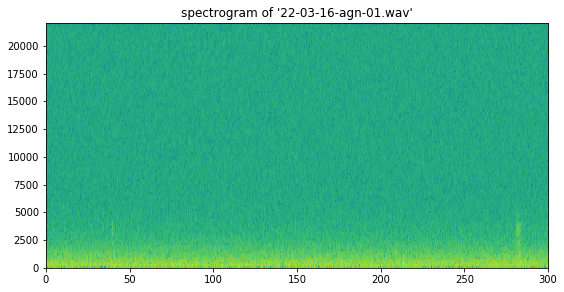

In [34]:
import os
import wave

import pylab


def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(9, 4.5))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')


def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


wav_file = '22-03-16-agn-01.wav'
graph_spectrogram(wav_file)